In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import metrics

# setting some params
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


We can treat this problem as either regression or classification problem as the values are between 0 and 10. Let's choose classification for simplicity

This dataset consists of only six types of quality values. We will thus map the quality values from 0 to 5

In [4]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}

# you can use the map function of pandas with any dictionary
# to convert the values in a given column to values in a dictionary
df.loc[:, "quality"] = df.quality.map(quality_mapping)

In [5]:
# splitting into train and test set

# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after shuffling

df = df.sample(frac=1).reset_index(drop=True)

# 1000 rows for training
df_train = df.head(1000)

# 599 rows for testing/validation
df_test = df.tail(599)

In [7]:
clf = tree.DecisionTreeClassifier(max_depth=3)

# columns you want to train 
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol']

# train the model on provided features

clf.fit(df_train[cols], df_train.quality)

DecisionTreeClassifier(max_depth=3)

In [8]:
# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculating accuracy on train data
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculating accuracy on test data
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(f"Train accuracy is {train_accuracy}")
print(f"Test accuracy is {test_accuracy}")

Train accuracy is 0.596
Test accuracy is 0.5542570951585977


In [9]:
# increasing depth to 9
clf = tree.DecisionTreeClassifier(max_depth=9)
clf.fit(df_train[cols], df_train.quality)

# generate predictions on the training set
train_predictions = clf.predict(df_train[cols])

# generate predictions on the test set
test_predictions = clf.predict(df_test[cols])

# calculating accuracy on train data
train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)

# calculating accuracy on test data
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

print(f"Train accuracy is {train_accuracy}")
print(f"Test accuracy is {test_accuracy}")

Train accuracy is 0.884
Test accuracy is 0.5876460767946577


### Plot for different values of max_depth

In [10]:
# intialize list to store accuracies for training and test data
# we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

# iterate over a few depth values
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    clf.fit(df_train[cols], df_train.quality)

    # create training and test predictions
    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])
    
    # calculate training and test accuracies
    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
    
    # append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

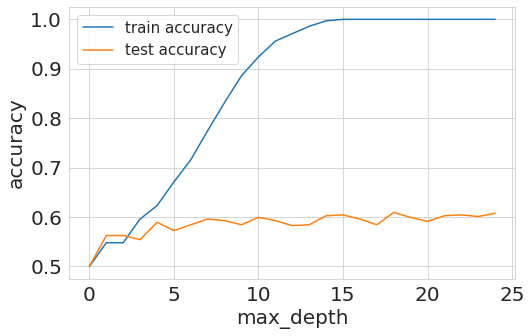

In [11]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

## Cross-Validation

In [12]:
# check out the python script